In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os


In [62]:


# location = os.getcwd()
# for event in tf.train.summary_iterator(os.path.join(location, 'paper\\logs\\env_w_32_2\\events.out.tfevents.1604387438.c7266f2e050e')):
#     for value in event.summary.value:
#         print(value.tag)
#         if value.HasField('simple_value'):
#             print(value.simple_value)
            
location = os.getcwd()
ls = []
for event in tf.train.summary_iterator(os.path.join(location, 'paper\\logs\\env_w_32_2\\events.out.tfevents.1604387438.c7266f2e050e')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls.append(value.simple_value)
np.savetxt('paper.txt', ls)

In [3]:
location = os.getcwd()
ls = []
for event in tf.train.summary_iterator(os.path.join(location, 'envelope_weight_32_1_dst\\events.out.tfevents.1605103212.b627cba1925b')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls.append(value.simple_value)
np.savetxt('envelope_weight_32_1_dst.txt', ls)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [63]:
location = os.getcwd()
ls = []
for event in tf.train.summary_iterator(os.path.join(location, 'envelope_w_32_no_ckpt_new_approach_2\\logs\\events.out.tfevents.1604740680.e3d3989ca740')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls.append(value.simple_value)
for event in tf.train.summary_iterator(os.path.join(location, 'envelope_w_32_no_ckpt_new_approach_2\\logs\\events.out.tfevents.1604773459.1171f76420b7')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls.append(value.simple_value)
np.savetxt('proposed.txt', ls)


In [64]:
location = os.getcwd()
ls_sw = []
for event in tf.train.summary_iterator(os.path.join(location, 'paper_switch_loss\\logs\\events.out.tfevents.1604411314.c7266f2e050e')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls_sw.append(value.simple_value)
np.savetxt('paper_switch_loss.txt', ls_sw)

In [6]:
paper_switch_loss = np.loadtxt('paper_switch_loss.txt')
paper = np.loadtxt('paper.txt')
proposed = np.loadtxt('proposed.txt')
envelope_weight_32_1_dst = np.loadtxt('envelope_weight_32_1_dst.txt')

In [66]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

In [10]:
envelope_weight_32_1_dst[0:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33649892,
       1.86754346, 1.67362225, 1.65121365, 1.64710748, 1.5994873 ,
       1.511199  , 1.45782375, 1.42604244, 1.20550752, 0.91947478,
       0.79479146, 0.6838181 , 0.55475599, 0.56888211, 0.45295969,
       0.43231049, 0.38211578, 0.52300829, 0.36687627, 0.34883225,
       0.32956773, 0.32710603, 0.40317997, 0.41001236, 0.34311971,
       0.32048425, 0.45233011, 0.30840734, 0.35829616, 0.4568921 ,
       0.40036148, 0.43600655, 0.37270239, 0.40627053, 0.90971416,
       1.56216872, 1.48521721, 1.36051917, 1.54273903, 1.63432169,
       1.24220884, 1.30795383, 1.22318912, 1.21275854, 1.14577806,
       1.12597036, 1.11205971, 0.95498198, 0.94505584, 0.971771  ,
       0.90837014, 0.92870551, 0.78903168, 0.7695629 , 0.89695

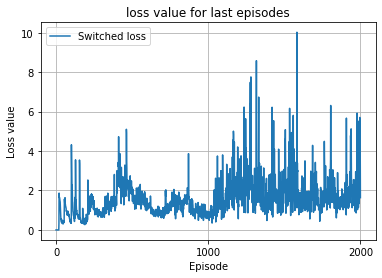

In [14]:
x = np.linspace(0, 2000,2000)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
# ax.plot(x, paper, label='MORL')  # Plot some data on the axes.
# ax.plot(x, proposed[41:], label='Proposed')  # Plot more data on the axes...
# ax.plot(x, paper_switch_loss, label='Switched loss')  # Plot more data on the axes...
ax.plot(x, envelope_weight_32_1_dst, label='Switched loss')

ax.set_xlabel('Episode')  # Add an x-label to the axes.
ax.set_ylabel('Loss value')  # Add a y-label to the axes.
ax.set_title("loss value for last episodes")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.grid(True)
ax.set_xticks(np.arange(min(x), max(x)+1, 1000.0))
plt.savefig('full_loss.pdf', format="pdf")

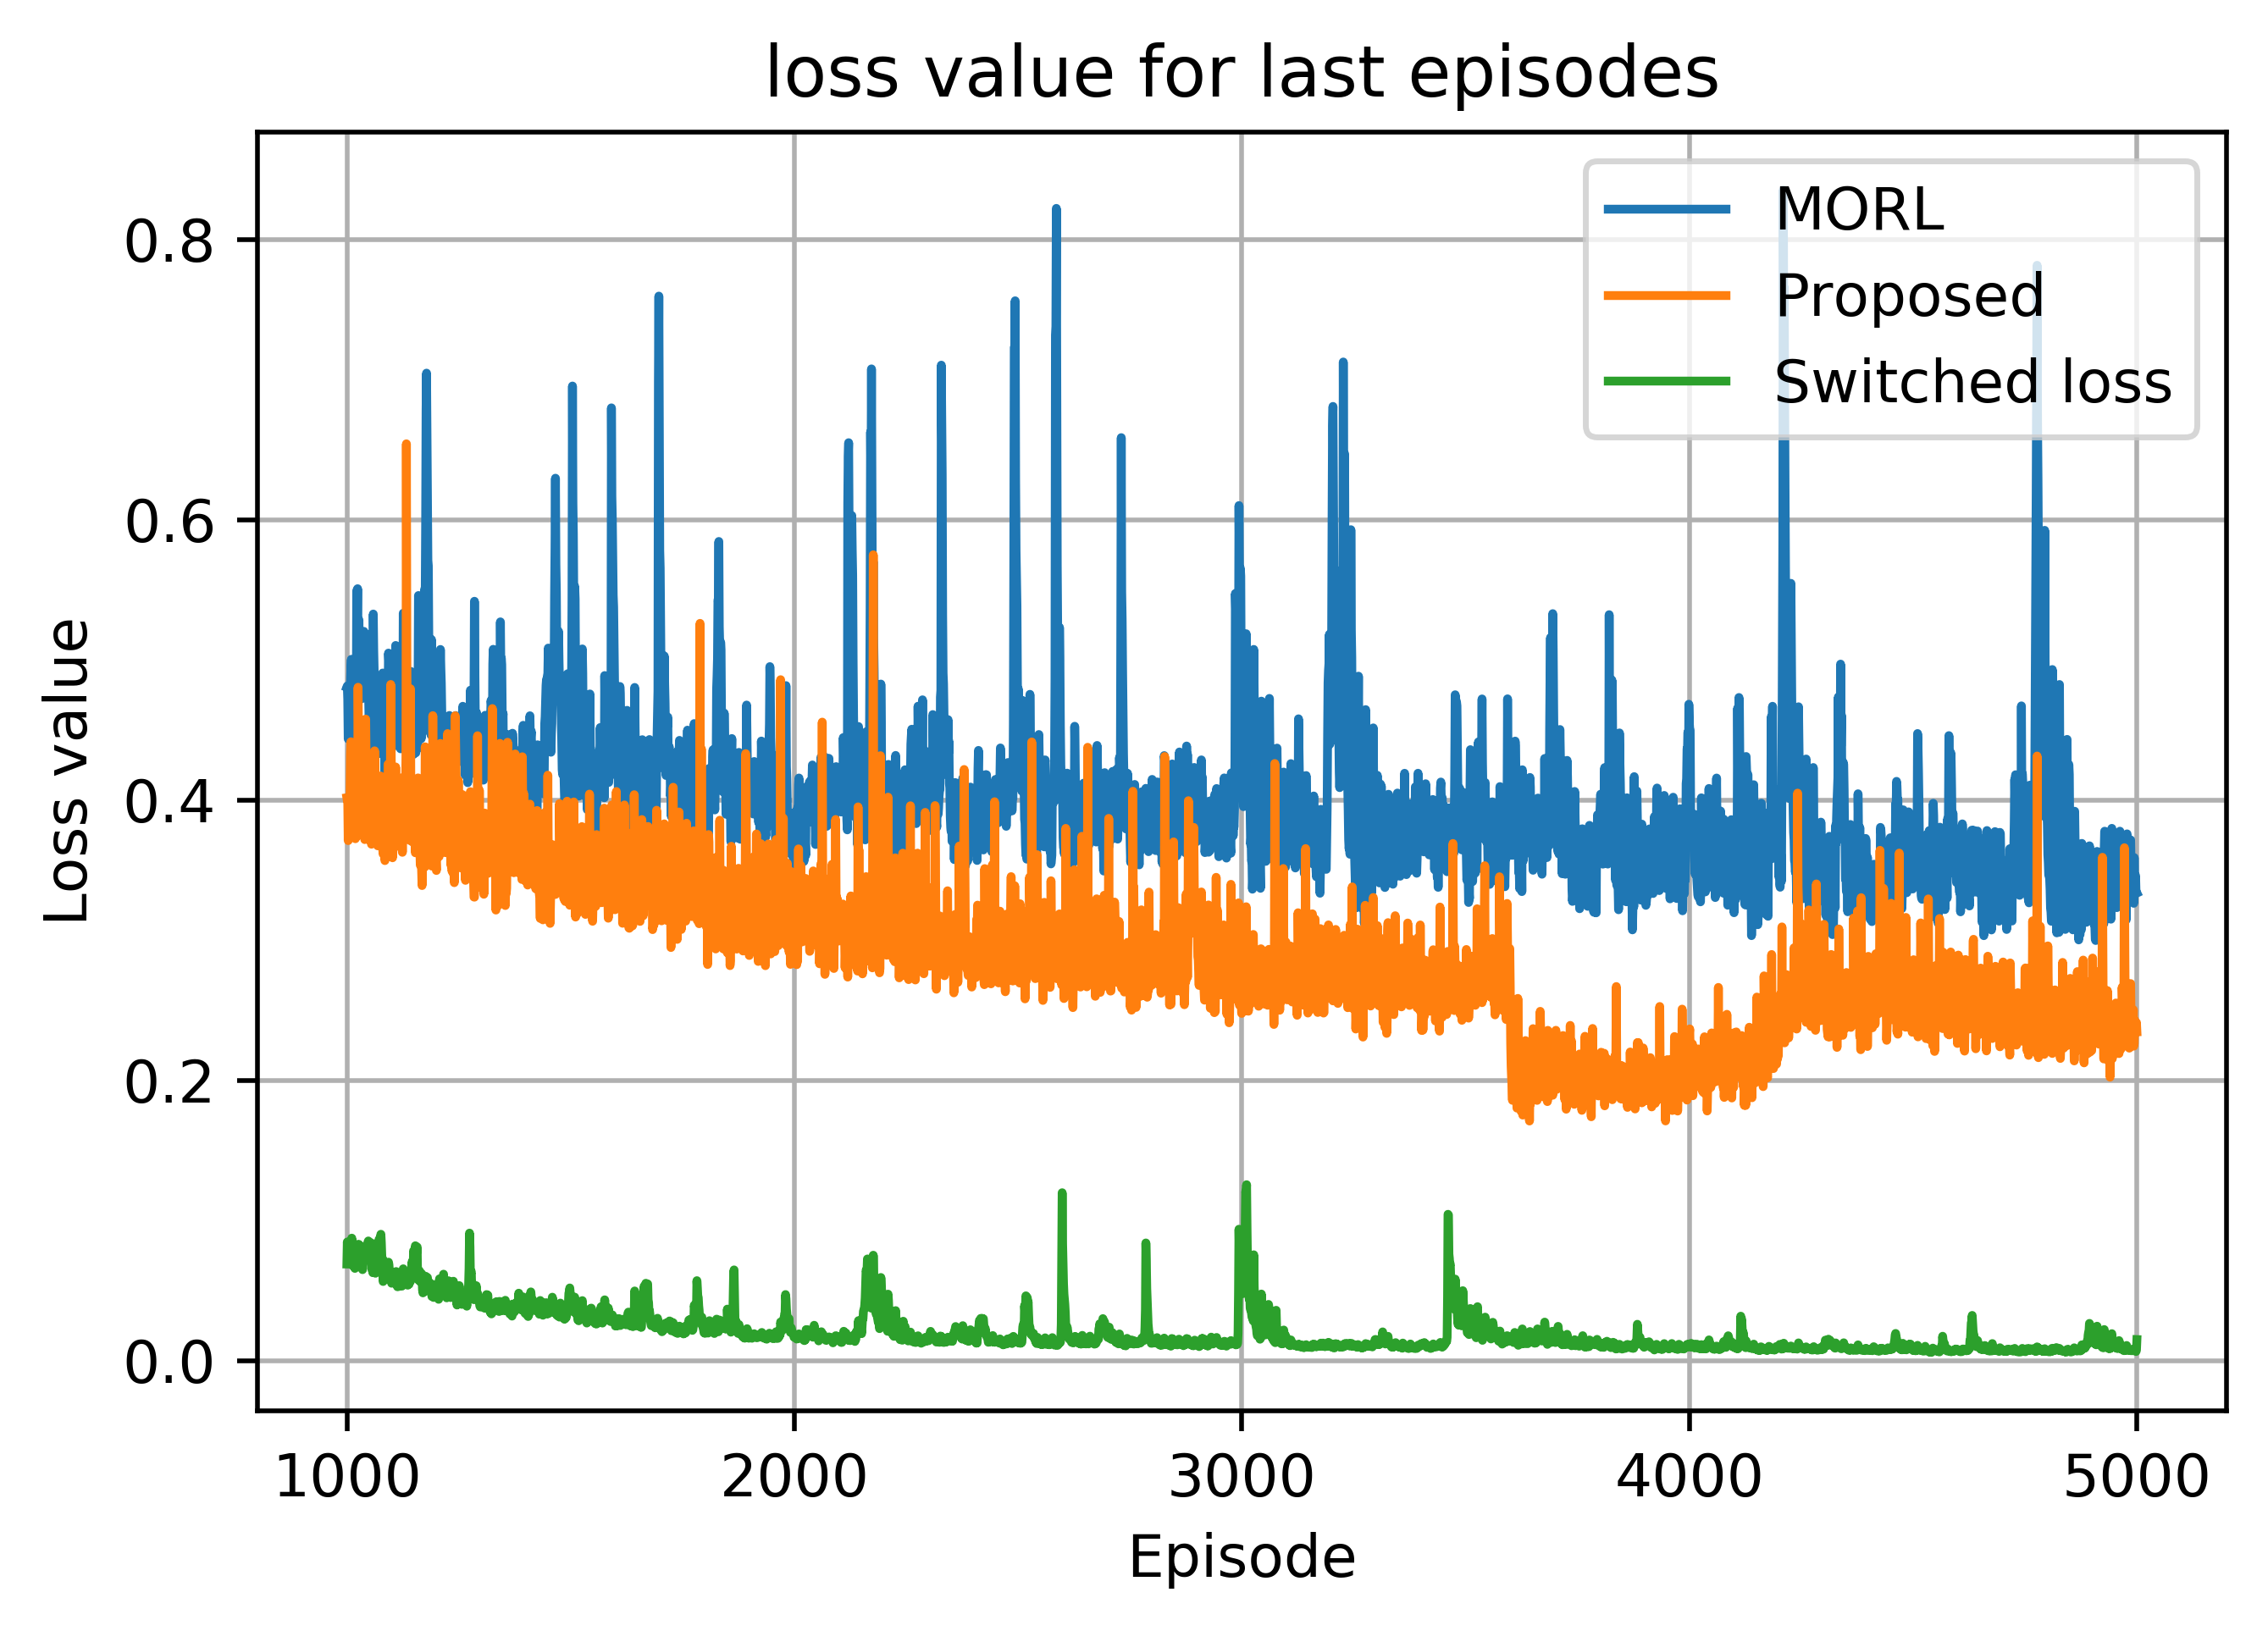

In [101]:
x = np.linspace(1000, 5000, 4000)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, paper[1000:], label='MORL')  # Plot some data on the axes.
ax.plot(x, proposed[5041-4000:], label='Proposed')  # Plot more data on the axes...
ax.plot(x, paper_switch_loss[1000:], label='Switched loss')  # Plot more data on the axes...
ax.set_xlabel('Episode')  # Add an x-label to the axes.
ax.set_ylabel('Loss value')  # Add a y-label to the axes.
ax.set_title("loss value for last episodes")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.grid(True)
ax.set_xticks(np.arange(min(x), max(x)+1, 1000.0))
plt.savefig('partial_loss.pdf', format="pdf")

In [82]:
paper.shape

(5000,)